##  Sports Betting Analysis

In [12]:
from sqlalchemy import create_engine
import pandas as pd
import getpass
import numpy as np
import seaborn as sns

In [13]:
pswd = getpass.getpass('Password:')

Password:········


In [14]:
aa = create_engine('postgresql://colekev:'+ pswd + '@54.227.123.44:5432/armchair_analysis')

create_engine : establishes how we are communicate with the database.
    and defines where the db is.
    

In [15]:
team = pd.read_sql_query('''SELECT * FROM team''',aa)

In [515]:
pass_yr = pd.read_sql_query('''SELECT year, SUM(py) as py, SUM(ry) as ry FROM offense GROUP BY year''',aa)

In [516]:
pass_yr.head()

,year,py,ry
0,2010,126119,60834
1,2000,114239,57619
2,2006,117111,62725
3,2003,114642,62945
4,2012,131785,62403


In [517]:
pass_yr['pass_per'] = pass_yr.py / (pass_yr.py + pass_yr.ry)
pass_yr.head()

,year,py,ry,pass_per
0,2010,126119,60834,0.674603
1,2000,114239,57619,0.664729
2,2006,117111,62725,0.651210
3,2003,114642,62945,0.645554
4,2012,131785,62403,0.678646


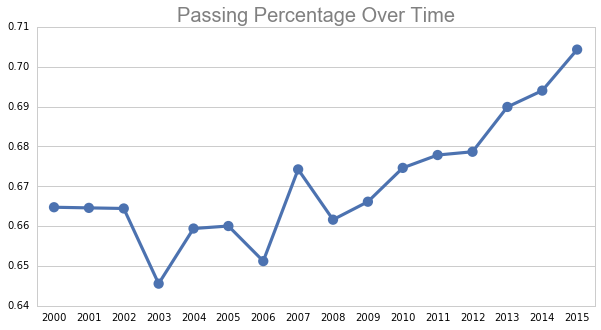

In [528]:
plt.figure(figsize=(10,5))
ax = sns.pointplot(x = 'year', y = 'pass_per', data=pass_yr)

ax.tick_params(labelsize=10,labelcolor="black")
ax.set_xlabel("",size = 12,color="black")
# Set the ylabel of the graph from here
ax.set_ylabel("",size = 12)
ax.axes.set_title('Passing Percentage Over Time', color = 'black', fontsize=20,alpha=0.5)
plt.show()

In [5]:
team.head(2)

,tid,gid,tname,pts,q1p,q2p,q3p,q4p,rfd,pfd,...,dp,fsp,ohp,pbep,dlp,dsp,dum,pfn,snpo,snpd
0,1,1,SF,28,7,7,7,7,6,16,...,0,0,2,1,3,2,0,1,0,0
1,2,1,ATL,36,6,16,14,0,6,13,...,7,1,0,0,2,2,0,0,0,0


In [16]:
game = pd.read_sql_query('''SELECT * FROM game''',aa)

In [17]:
game['ptdiffh'] = game.ptsh - game.ptsv

In [18]:
game['beatsprh'] = np.where(game.ptdiffh > game.sprv, 1, np.where(game.ptdiffh < game.sprv, 0, np.nan))

In [19]:
game['beatsprv'] = np.where(game.ptdiffh < game.sprv, 1, np.where(game.ptdiffh > game.sprv, 0, np.nan))

In [20]:
game['totpts'] = game.ptsv + game.ptsh

In [21]:
game['ou_result'] = np.where(game.totpts > game.ou, 1, np.where(game.totpts < game.ou, 0, np.nan))

In [22]:
game['beatspdrptsh'] = game.ptdiffh - game.sprv

In [23]:
game['beatspdrptsv'] = game.sprv - game.ptdiffh

In [24]:
game['winh'] = np.where(game.ptdiffh > 0, 1, np.where(game.ptdiffh < 0, 0, np.nan))

In [25]:
game['winv'] = np.where(game.ptdiffh < 0, 1, np.where(game.ptdiffh > 0, 0, np.nan))

In [26]:
game.head(10)

,gid,seas,wk,day,v,h,stad,temp,humd,wspd,...,ptsh,ptdiffh,beatsprh,beatsprv,totpts,ou_result,beatspdrptsh,beatspdrptsv,winh,winv
0,1,2000,1,SUN,SF,ATL,Georgia Dome,79,None,None,...,36,8,1.0,0.0,64,1.0,1.0,-1.0,1.0,0.0
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,78,63,9,...,7,-20,0.0,1.0,34,0.0,-10.0,10.0,0.0,1.0
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,109,19,5,...,14,-27,0.0,1.0,55,1.0,-33.0,33.0,0.0,1.0
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,77,66,5,...,16,-4,0.0,1.0,36,NaN,-6.5,6.5,0.0,1.0
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,90,50,8,...,14,-13,0.0,1.0,41,0.0,-10.0,10.0,0.0,1.0
5,6,2000,1,SUN,SEA,MIA,Pro Player Stadium,89,59,13,...,23,23,1.0,0.0,23,0.0,20.0,-20.0,1.0,0.0
6,7,2000,1,SUN,CHI,MIN,Metrodome,65,None,None,...,30,3,0.0,1.0,57,1.0,-1.5,1.5,1.0,0.0
7,8,2000,1,SUN,TB,NE,Foxboro Stadium,71,93,5,...,16,-5,0.0,1.0,37,1.0,-2.0,2.0,0.0,1.0
8,9,2000,1,SUN,DET,NO,Louisiana Superdome,89,None,None,...,10,-4,0.0,1.0,24,0.0,-5.0,5.0,0.0,1.0
9,10,2000,1,SUN,ARI,NYG,Giants Stadium,80,79,3,...,21,5,0.0,1.0,37,0.0,-2.0,2.0,1.0,0.0


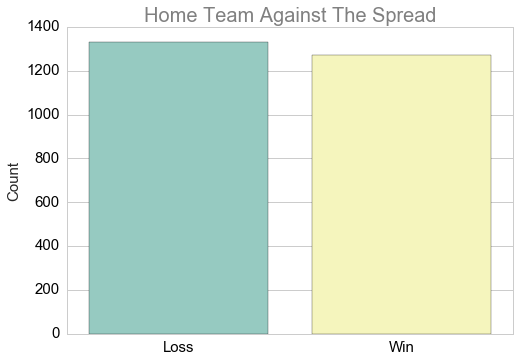

In [505]:

sns.set(style="whitegrid")
home_cover = pd.DataFrame()
home_cover['Home Beat Spread'] = game_no_na['beatsprh'].replace(0, 'Loss')
home_cover['Home Beat Spread'] = home_cover['Home Beat Spread'].replace(1, 'Win')
home_cover['Home Win'] = game_no_na['winh'].replace(1, 'Win')
home_cover['Home Win'] = home_cover['Home Win'].replace(0, 'Loss')


# Draw a nested barplot to show survival for class and sex
ax = sns.countplot(x="Home Beat Spread", data=home_cover, palette="Set3")

ax.tick_params(labelsize=15,labelcolor="black")
ax.set_xlabel("",size = 67,color="r",alpha=0.5)
# Set the ylabel of the graph from here
ax.set_ylabel("Count",size = 15)
ax.axes.set_title('Home Team Against The Spread', color = 'black', fontsize=20,alpha=0.5)

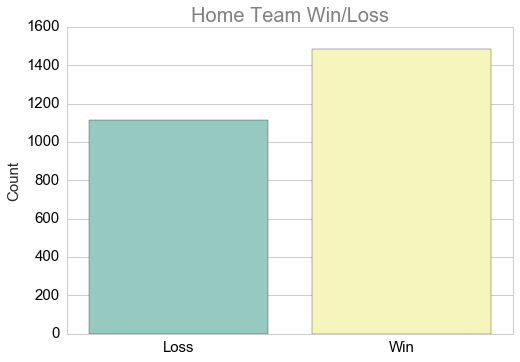

In [506]:
ax = sns.countplot(x="Home Win", data=home_cover, palette="Set3")
ax.tick_params(labelsize=15,labelcolor="black")
ax.set_xlabel("",size = 67,color="r",alpha=0.5)
# Set the ylabel of the graph from here
ax.set_ylabel("Count",size = 15)
ax.axes.set_title('Home Team Win/Loss', color = 'black', fontsize=20,alpha=0.5)

In [27]:
stat_df = team[['gid', 'tname', 'pts', 'q4p', 'ry', 'ra', 'py', 'pa', 'sk', 'ints', 'fum', 'pu', 'pry', 'kry', 'pen', 'top', 'tdr', 
            'tdp', 'tdt', 'fgm', 'fgat', 'qba', 'qby', 'sky', 'sfpy', 'drv', 'npy', 'rtd', 'dp']]

In [28]:
stat_df['ypr'] = stat_df.ry / stat_df.ra
stat_df['ypp'] = stat_df.py / stat_df.pa

/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
col_names = ['gid', 'h']

for col in stat_df.columns[2:]:
    col_names.append(col + '_h')
    
stat_df.columns = col_names


In [30]:
stat_df.columns

Index(['gid', 'h', 'pts_h', 'q4p_h', 'ry_h', 'ra_h', 'py_h', 'pa_h', 'sk_h',
       'ints_h', 'fum_h', 'pu_h', 'pry_h', 'kry_h', 'pen_h', 'top_h', 'tdr_h',
       'tdp_h', 'tdt_h', 'fgm_h', 'fgat_h', 'qba_h', 'qby_h', 'sky_h',
       'sfpy_h', 'drv_h', 'npy_h', 'rtd_h', 'dp_h', 'ypr_h', 'ypp_h'],
      dtype='object')

In [31]:
# merge h

game_h_v = game[['gid', 'h', 'v', 'ou_result', 'beatsprh', 'beatsprv', 'beatspdrptsh', 'beatspdrptsv', 'winh', 'winv', 'totpts']]
game_h_v = pd.merge(game_h_v, stat_df, on=['gid', 'h'], how='inner')
#game_h_v=game_h_v.rename(columns = {'beatsprh':'beatspr'})

game_h_v.head(2)

,gid,h,v,ou_result,beatsprh,beatsprv,beatspdrptsh,beatspdrptsv,winh,winv,...,qba_h,qby_h,sky_h,sfpy_h,drv_h,npy_h,rtd_h,dp_h,ypr_h,ypp_h
0,1,ATL,SF,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,...,4,12,0,371,11,75,0,7,2.96875,8.516129
1,2,CLE,JAC,0.0,0.0,1.0,-10.0,10.0,0.0,1.0,...,2,32,7,211,9,237,0,0,6.00000,5.666667


In [32]:
col_names = ['gid', 'v']

for col in stat_df.columns[2:]:
    col_names.append(col + '_v')
    
stat_df.columns = col_names

In [33]:
# merge h

game_h_v = pd.merge(game_h_v, stat_df, on=['gid', 'v'], how='inner')

game_h_v.head(2)

,gid,h,v,ou_result,beatsprh,beatsprv,beatspdrptsh,beatspdrptsv,winh,winv,...,qba_h_v,qby_h_v,sky_h_v,sfpy_h_v,drv_h_v,npy_h_v,rtd_h_v,dp_h_v,ypr_h_v,ypp_h_v
0,1,ATL,SF,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,...,2,22,6,273,11,175,0,0,3.833333,6.861111
1,2,CLE,JAC,0.0,0.0,1.0,-10.0,10.0,0.0,1.0,...,4,0,22,202,9,97,0,0,2.975000,8.205882


In [34]:
stats_df = team[['gid', 'tname']]

In [35]:
game_h_v=game_h_v.rename(columns = {'h':'tname'})
game_h_v.columns = game_h_v.columns.str.replace('_h_v', '_opp')
game_h_v.columns = game_h_v.columns.str.replace('_h', '_own')
game_h_v.head(2)

,gid,tname,v,ou_result,beatsprh,beatsprv,beatspdrptsh,beatspdrptsv,winh,winv,...,qba_opp,qby_opp,sky_opp,sfpy_opp,drv_opp,npy_opp,rtd_opp,dp_opp,ypr_opp,ypp_opp
0,1,ATL,SF,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,...,2,22,6,273,11,175,0,0,3.833333,6.861111
1,2,CLE,JAC,0.0,0.0,1.0,-10.0,10.0,0.0,1.0,...,4,0,22,202,9,97,0,0,2.975000,8.205882


In [36]:
# merge h

stats_df = pd.merge(stats_df, game_h_v, on=['gid', 'tname'], how='left')
stats_df.head(2)



,gid,tname,v,ou_result,beatsprh,beatsprv,beatspdrptsh,beatspdrptsv,winh,winv,...,qba_opp,qby_opp,sky_opp,sfpy_opp,drv_opp,npy_opp,rtd_opp,dp_opp,ypr_opp,ypp_opp
0,1,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ATL,SF,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,...,2.0,22.0,6.0,273.0,11.0,175.0,0.0,0.0,3.833333,6.861111


In [37]:
stats_h = stats_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
stats_h = stats_h.drop('v', 1)
stats_h = stats_h.drop('beatsprv', 1)
stats_h = stats_h.drop('beatspdrptsv', 1)
stats_h = stats_h.drop('winv', 1)
stats_h=stats_h.rename(columns = {'beatsprh':'beatspr'})
stats_h=stats_h.rename(columns = {'beatspdrptsh':'beatsprpts'})
stats_h=stats_h.rename(columns = {'winh':'win'})
stats_h.head(2)

,gid,tname,ou_result,beatspr,beatsprpts,win,totpts,pts_own,q4p_own,ry_own,...,qba_opp,qby_opp,sky_opp,sfpy_opp,drv_opp,npy_opp,rtd_opp,dp_opp,ypr_opp,ypp_opp
1,1,ATL,1.0,1.0,1.0,1.0,64.0,36.0,0.0,95.0,...,2.0,22.0,6.0,273.0,11.0,175.0,0.0,0.0,3.833333,6.861111
3,2,CLE,0.0,0.0,-10.0,0.0,34.0,7.0,0.0,96.0,...,4.0,0.0,22.0,202.0,9.0,97.0,0.0,0.0,2.975000,8.205882


In [38]:
stats_df = team[['gid', 'tname']]

In [39]:
game_h_v=game_h_v.rename(columns = {'tname':'h'})
game_h_v=game_h_v.rename(columns = {'v':'tname'})
game_h_v.columns = game_h_v.columns.str.replace('_own', '_op1')
game_h_v.columns = game_h_v.columns.str.replace('_opp', '_ow1')
game_h_v.columns = game_h_v.columns.str.replace('_ow1', '_own')
game_h_v.columns = game_h_v.columns.str.replace('_op1', '_opp')
game_h_v.head(2)

,gid,h,tname,ou_result,beatsprh,beatsprv,beatspdrptsh,beatspdrptsv,winh,winv,...,qba_own,qby_own,sky_own,sfpy_own,drv_own,npy_own,rtd_own,dp_own,ypr_own,ypp_own
0,1,ATL,SF,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,...,2,22,6,273,11,175,0,0,3.833333,6.861111
1,2,CLE,JAC,0.0,0.0,1.0,-10.0,10.0,0.0,1.0,...,4,0,22,202,9,97,0,0,2.975000,8.205882


In [40]:
# merge v

stats_df = pd.merge(stats_df, game_h_v, on=['gid', 'tname'], how='left')
stats_df.head(2)

,gid,tname,h,ou_result,beatsprh,beatsprv,beatspdrptsh,beatspdrptsv,winh,winv,...,qba_own,qby_own,sky_own,sfpy_own,drv_own,npy_own,rtd_own,dp_own,ypr_own,ypp_own
0,1,SF,ATL,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,...,2.0,22.0,6.0,273.0,11.0,175.0,0.0,0.0,3.833333,6.861111
1,1,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
stats_v = stats_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
stats_v = stats_v.drop('h', 1)
stats_v = stats_v.drop('beatsprh', 1)
stats_v = stats_v.drop('beatspdrptsh', 1)
stats_v = stats_v.drop('winh', 1)
stats_v=stats_v.rename(columns = {'beatsprv':'beatspr'})
stats_v=stats_v.rename(columns = {'beatspdrptsv':'beatsprpts'})
stats_v=stats_v.rename(columns = {'winv':'win'})
stats_v.head(2)

,gid,tname,ou_result,beatspr,beatsprpts,win,totpts,pts_opp,q4p_opp,ry_opp,...,qba_own,qby_own,sky_own,sfpy_own,drv_own,npy_own,rtd_own,dp_own,ypr_own,ypp_own
0,1,SF,1.0,0.0,-1.0,0.0,64.0,36.0,0.0,95.0,...,2.0,22.0,6.0,273.0,11.0,175.0,0.0,0.0,3.833333,6.861111
2,2,JAC,0.0,1.0,10.0,1.0,34.0,7.0,0.0,96.0,...,4.0,0.0,22.0,202.0,9.0,97.0,0.0,0.0,2.975000,8.205882


In [42]:
stats_df = pd.concat([stats_h, stats_v])

In [43]:
stats_df.head(2)

,beatspr,beatsprpts,dp_opp,dp_own,drv_opp,drv_own,fgat_opp,fgat_own,fgm_opp,fgm_own,...,tdt_own,tname,top_opp,top_own,totpts,win,ypp_opp,ypp_own,ypr_opp,ypr_own
1,1.0,1.0,0.0,7.0,11.0,11.0,0.0,5.0,0.0,5.0,...,1.0,ATL,27.5,31.5,64.0,1.0,6.861111,8.516129,3.833333,2.96875
3,0.0,-10.0,0.0,0.0,9.0,9.0,2.0,0.0,2.0,0.0,...,0.0,CLE,37.0,23.0,34.0,0.0,8.205882,5.666667,2.975000,6.00000


In [44]:
stats_df = stats_df.sort_values(['gid'])

In [45]:
stats_only = stats_df.drop(stats_df[['tname', 'gid']], axis = 1).columns
#stats_only = ['ypp_own', 'ypp_opp']

In [46]:
stats_roll = stats_df[['gid', 'tname']]

def roll_stats(stats, periods):
    for stat in stats:
        group = stats_df[['tname', stat]].groupby(['tname'])
        
        for period in periods:
            stats_roll[stat+'_roll{}'.format(period)] = group[stat].apply(pd.rolling_mean, period, min_periods = period)
            
periods = [1,2,3,4,5,15]

roll_stats(stats_only, periods)

/Users/colekev/anaconda3/lib/python3.5/site-packages/pandas/core/groupby.py:636: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=1).mean()
  return func(g, *args, **kwargs)
/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/colekev/anaconda3/lib/python3.5/site-packages/pandas/core/groupby.py:636: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=2,center=False,window=2).mean()
  return func(g, *args, **kwargs)
/Users/colekev/anaconda3/lib/python3.5/site-packages/pandas/core/groupby.py:636

In [47]:
for col in stats_roll.columns[2:]:
    stats_roll[col] = stats_roll.groupby(['tname'])[col].shift(1)

In [48]:
stats_roll[stats_roll.tname == "SF"][:10]

,gid,tname,beatspr_roll1,beatspr_roll2,beatspr_roll3,beatspr_roll4,beatspr_roll5,beatspr_roll15,beatsprpts_roll1,beatsprpts_roll2,...,ypr_opp_roll3,ypr_opp_roll4,ypr_opp_roll5,ypr_opp_roll15,ypr_own_roll1,ypr_own_roll2,ypr_own_roll3,ypr_own_roll4,ypr_own_roll5,ypr_own_roll15
0,1,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,25,SF,0.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,3.833333,NaN,NaN,NaN,NaN,NaN
96,49,SF,0.0,0.0,NaN,NaN,NaN,NaN,-13.0,-7.00,...,NaN,NaN,NaN,NaN,4.523810,4.178571,NaN,NaN,NaN,NaN
133,67,SF,1.0,0.5,0.333333,NaN,NaN,NaN,23.5,5.25,...,3.759891,NaN,NaN,NaN,5.448980,4.986395,4.602041,NaN,NaN,NaN
167,84,SF,1.0,1.0,0.666667,0.50,NaN,NaN,3.0,13.25,...,4.520308,4.132419,NaN,NaN,4.062500,4.755740,4.678430,4.467156,NaN,NaN
178,90,SF,0.0,0.5,0.666667,0.50,0.4,NaN,-1.5,0.75,...,5.196779,4.618172,4.288288,NaN,4.000000,4.031250,4.503827,4.508822,4.373724,NaN
206,104,SF,1.0,0.5,0.666667,0.75,0.6,NaN,1.0,-0.25,...,4.806610,4.962100,4.546151,NaN,5.000000,4.500000,4.354167,4.627870,4.607058,NaN
247,124,SF,0.0,0.5,0.333333,0.50,0.6,NaN,-15.0,-7.00,...,4.351482,4.576111,4.746603,NaN,7.111111,6.055556,5.370370,5.043403,5.124518,NaN
270,136,SF,0.0,0.0,0.333333,0.25,0.4,NaN,-3.5,-9.25,...,4.369782,4.505278,4.654222,NaN,5.111111,6.111111,5.740741,5.305556,5.056944,NaN
307,154,SF,0.0,0.0,0.000000,0.25,0.2,NaN,-11.0,-7.25,...,4.010256,4.072208,4.240120,NaN,4.200000,4.655556,5.474074,5.355556,5.084444,NaN


In [49]:
# Rename columns and merge
#home

col_names = ['gid', 'h']

for col in stats_roll.columns[2:]:
    col_names.append(col + '_h')
    
stats_roll.columns = col_names


In [50]:
# merge h

game_h = pd.merge(game, stats_roll, on=['gid', 'h'], how='inner')

game_h.head(2)

,gid,seas,wk,day,v,h,stad,temp,humd,wspd,...,ypr_opp_roll3_h,ypr_opp_roll4_h,ypr_opp_roll5_h,ypr_opp_roll15_h,ypr_own_roll1_h,ypr_own_roll2_h,ypr_own_roll3_h,ypr_own_roll4_h,ypr_own_roll5_h,ypr_own_roll15_h
0,1,2000,1,SUN,SF,ATL,Georgia Dome,79,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,78,63,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Rename columns and merge
#home

col_names = ['gid', 'v']

for col in stats_roll.columns[2:]:
    col_names.append(col + '_v')
    
stats_roll.columns = col_names

# merge v

game_h_v = pd.merge(game_h, stats_roll, on=['gid', 'v'], how='inner')

game_h_v.head(2)



,gid,seas,wk,day,v,h,stad,temp,humd,wspd,...,ypr_opp_roll3_h_v,ypr_opp_roll4_h_v,ypr_opp_roll5_h_v,ypr_opp_roll15_h_v,ypr_own_roll1_h_v,ypr_own_roll2_h_v,ypr_own_roll3_h_v,ypr_own_roll4_h_v,ypr_own_roll5_h_v,ypr_own_roll15_h_v
0,1,2000,1,SUN,SF,ATL,Georgia Dome,79,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,78,63,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
game_h_v.columns = game_h_v.columns.str.replace('h_v', 'v')
game_h_v.head(2)

,gid,seas,wk,day,v,h,stad,temp,humd,wspd,...,ypr_opp_roll3_v,ypr_opp_roll4_v,ypr_opp_roll5_v,ypr_opp_roll15_v,ypr_own_roll1_v,ypr_own_roll2_v,ypr_own_roll3_v,ypr_own_roll4_v,ypr_own_roll5_v,ypr_own_roll15_v
0,1,2000,1,SUN,SF,ATL,Georgia Dome,79,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,78,63,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
game_h_v = game_h_v.drop('ou_result', 1)
game_no_na = game_h_v.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [211]:
game_no_na.columns[24:27]

Index(['winv', 'beatspr_roll1_h', 'beatspr_roll2_h'], dtype='object')

In [55]:
# h_col = game_no_na.columns[26:][:(len(game_no_na.columns[26])/2)]
# v_col = X.columns[(len(game_no_na.columns[26])/2):]

# diff = pd.DataFrame()

# for x in range(0, len(h_col)):
#     diff['diff_'+ h_col[x]] = X[h_col[x]] - X[v_col[x]]
    
# diff.shape

In [213]:
from sklearn.cross_validation import train_test_split

wk_train = []
wk_val = []
wk_test = []

for i in range(1,18):
    # Only testing last 10 years
    
    wk = game_no_na[game_no_na.wk == i]

    last_3 = wk[wk.seas >= 2001]
    last_3 = last_3[last_3.seas < 2012]
    last_4 = wk[wk.seas >= 2012]
    last_4 = last_4[last_4.seas < 2014]
    last_2 = wk[wk.seas >= 2014]

    #X, y = pd.concat([last_5[last_5.columns[26:]], last_5[['ou', 'sprv']]], axis = 1), np.ravel(last_5.beatsprh)

    X_train = pd.concat([last_3[last_3.columns[25:]], last_3[['ou', 'sprv']]], axis = 1)
    X_val = pd.concat([last_4[last_4.columns[25:]], last_4[['ou', 'sprv']]], axis = 1)
    X_test = pd.concat([last_2[last_2.columns[25:]], last_2[['ou', 'sprv']]], axis = 1)

    y_train = np.ravel(last_3.beatsprh)
    y_val = np.ravel(last_4.beatsprh)
    y_test = np.ravel(last_2.beatsprh)
    
    wk_train.append([i, X_train, y_train])
    wk_val.append([i, X_val, y_val])
    wk_test.append([i, X_test, y_test])

In [1]:
# X_wk1_4_train = pd.concat([wk_train[i][1] for i in range(1,5)], axis = 0)
# y_wk1_4_train = pd.concat([wk_train[i][2] for i in range(1,5)], axis = 0)
# X_wk1_4_val = pd.concat([wk_val[i][1] for i in range(1,5)], axis = 0)
# y_wk1_4_val = pd.concat([wk_val[i][2] for i in range(1,5)], axis = 0)
# X_wk1_4_test = pd.concat([wk_test[i][1] forInves i in range(1,5)], axis = 0)
# y_wk1_4_test = pd.concat([wk_test[i][2] for i in range(1,5)], axis = 0)

In [187]:
len(last_2)

363

In [86]:
# from sklearn.cross_validation import train_test_split

# features = {}

# for stat in stats.columns:
#     X, y = pd.concat([stats[stat], game_no_na[['ou', 'sprv']]], axis = 1), np.ravel(game_no_na.ou_result)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
#     log_model = LogisticRegression()
#     log_model.fit(X_train, y_train)
#     log_cvs = cross_val_score(log_model, X_train, y_train)
    
#     features[stat] = np.mean(log_cvs)

In [226]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# X_train, X_test, y_train, y_test = train_test_split(
#     (X - X.mean()) / (X.max() - X.min()), y, test_size=0.25, random_state=0)

selector = RFECV(LogisticRegression(), step=1)
selector = selector.fit((wk1_4_train - wk1_4_train.mean()) / (wk1_4_train.max() - wk1_4_train.min()), 
                        wk_train[0][2])

In [227]:
selector.n_features_

63

In [216]:
X_train.columns[selector.support_]

Index(['beatsprpts_roll1_h', 'beatsprpts_roll5_h', 'dp_own_roll1_h',
       'fgm_own_roll1_h', 'fum_own_roll1_h', 'fum_own_roll3_h',
       'fum_own_roll4_h', 'ints_opp_roll1_h', 'ints_opp_roll3_h',
       'npy_opp_roll5_h', 'pa_opp_roll1_h', 'pa_opp_roll5_h',
       'pen_own_roll4_h', 'pry_opp_roll1_h', 'pry_opp_roll5_h',
       'pu_opp_roll4_h', 'py_opp_roll1_h', 'py_opp_roll15_h',
       'q4p_opp_roll2_h', 'q4p_opp_roll5_h', 'q4p_own_roll3_h',
       'qba_opp_roll15_h', 'qba_own_roll2_h', 'qby_own_roll2_h',
       'qby_own_roll5_h', 'sfpy_own_roll1_h', 'sky_own_roll5_h',
       'tdr_own_roll3_h', 'tdt_own_roll1_h', 'tdt_own_roll5_h',
       'top_own_roll4_h', 'ypp_own_roll2_h', 'ypp_own_roll3_h',
       'ypr_own_roll2_h', 'ypr_own_roll15_h', 'beatsprpts_roll1_v',
       'drv_own_roll2_v', 'drv_own_roll3_v', 'drv_own_roll4_v',
       'fgat_opp_roll4_v', 'fgm_own_roll4_v', 'fgm_own_roll5_v',
       'fgm_own_roll15_v', 'ints_opp_roll2_v', 'pen_opp_roll1_v',
       'pen_opp_roll2_v', 'p

In [217]:
chosen = wk_train[0][1].columns[selector.support_]
wk_train[0][1] = wk_train[0][1][chosen]
wk_val[0][1] = wk_val[0][1][chosen]

In [ ]:
import pickle

with open('my_data.pkl', 'wb') as picklefile:
    pickle.dump(X, picklefile)

In [727]:
with open("X_log_reg_ou.pkl", 'rb') as picklefile: 
    my_old_data = pickle.load(picklefile)

In [731]:
my_old_data.columns

,beatspr_roll2_h,beatspr_roll3_h,beatspr_roll4_h,dp_own_roll2_h,drv_opp_roll5_h,drv_opp_roll15_h,drv_own_roll5_h,drv_own_roll15_h,fgat_opp_roll3_h,fgat_opp_roll4_h,...,totpts_roll1_v,win_roll1_v,win_roll2_v,win_roll5_v,win_roll15_v,ypp_opp_roll4_v,ypp_own_roll4_v,ypp_own_roll5_v,ypr_own_roll2_v,ypr_own_roll15_v
224,1.0,1.000000,0.75,1.0,12.0,11.666667,11.8,11.333333,1.333333,1.25,...,23.0,0.0,0.0,0.2,0.466667,5.871337,5.116559,5.309463,3.750000,3.861486
233,0.0,0.000000,0.25,4.5,14.0,13.133333,13.8,12.733333,1.666667,2.00,...,27.0,1.0,0.5,0.6,0.533333,6.902009,6.868940,6.672930,3.286111,4.209303
238,0.5,0.666667,0.75,5.0,13.6,11.933333,13.8,12.133333,1.333333,1.00,...,47.0,1.0,0.5,0.8,0.733333,6.371686,8.189240,8.080424,4.250000,4.333678
240,0.5,0.666667,0.50,7.0,12.8,12.000000,11.6,11.800000,1.666667,1.25,...,40.0,1.0,1.0,0.6,0.733333,7.494792,5.510553,6.313205,3.666667,3.723606
241,0.0,0.333333,0.50,0.0,12.0,11.866667,12.6,12.066667,2.000000,2.00,...,24.0,1.0,1.0,0.8,0.733333,5.652668,6.379535,5.864919,3.880519,4.652331


In [482]:
# resplit the new train test based on chosen features

X_train_lgr, X_test_lgr, y_train_lgr, y_test_lgr = train_test_split(X_logis_RFECV, y, test_size=0.25)

In [410]:
X_train_lgr.shape, y_test.shape

((660, 8), (220,))

In [218]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(wk_train[0][1], wk_train[0][2])
# logis_cvs = cross_val_score(logis_model, X_train_lgr, y_train_lgr)
# np.mean(logis_cvs)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
from sklearn.metrics import accuracy_score

logis_acc = accuracy_score(wk_val[0][2], logis_model.predict(wk_val[0][1]))
print(logis_acc)

0.578947368421


In [221]:
wk_val[0][2].shape

(19,)

In [225]:
wk_test[0][1] = wk_test[0][1][chosen]
logis_acc = accuracy_score(wk_test[0][2], logis_model.predict(wk_test[0][1]))
print(logis_acc)

0.444444444444


In [81]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], logis_model.coef_[0][i]) 

ypp_opp_roll15_h -0.198384713302
pry_own_roll1_v -0.0114726007802


In [208]:
X_test['prob'] = [x[0] for x in logis_model.predict_proba(X_test)]

X_test['y'] = y_test

#X_test_lgr['seas'] = last_5['seas']


X_test_prob_hi = X_test[X_test.prob > 0.85]
X_test_prob_low = X_test[X_test.prob < 0.15]

X_test = pd.concat([X_test_prob_hi, X_test_prob_low])


y_test = X_test['y']

X_test = X_test.drop('prob', 1)
X_test = X_test.drop('y', 1)

lgr_prob_acc = accuracy_score(np.ravel(y_test), logis_model.predict(X_test))
print(lgr_prob_acc, len(y_test))

0.5625 32


In [191]:
X_test['prob'] = [x[0] for x in logis_model.predict_proba(X_test)]

X_test['y'] = y_test

#X_test_lgr['seas'] = last_5['seas']


X_test_prob_hi = X_test[X_test.prob > 0.90]
X_test_prob_low = X_test[X_test.prob < 0.10]

X_test = pd.concat([X_test_prob_hi, X_test_prob_low])


y_test = X_test['y']

X_test = X_test.drop('prob', 1)
X_test = X_test.drop('y', 1)

lgr_prob_acc = accuracy_score(np.ravel(y_test), logis_model.predict(X_test))
print(lgr_prob_acc, len(y_test))

0.458923512748 353


/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [301]:
len(X_logis_RFECV)

1751

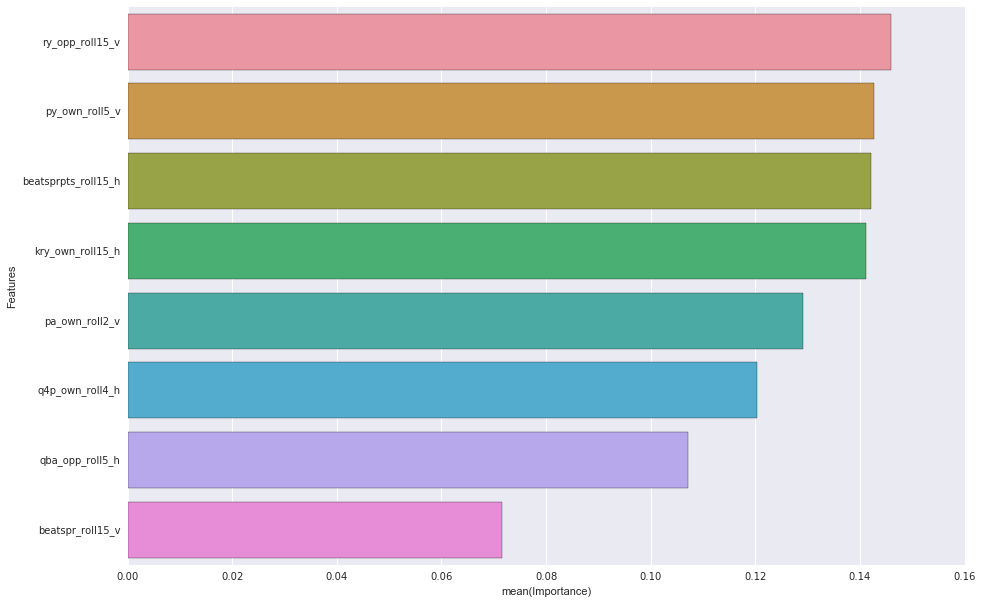

In [124]:
# build a classifier
#clf = RandomForestClassifier(n_estimators=100)
  
import seaborn as sns



clf = RandomForestClassifier(n_estimators=1000, criterion='entropy',
                            max_depth=None, bootstrap=True, min_samples_split=1, 
                            oob_score=True, min_samples_leaf=1)
clf = clf.fit(X_train, np.ravel(y_train))
clf.score(X_train, np.ravel(y_train))


features = X_train.columns
feature_importance = clf.feature_importances_
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df.sort_values('Importance', inplace = True, ascending = False)

importance_df.sort_values

# Plotting the Graph
g = sns.barplot(x = "Importance", y = "Features", data = importance_df.head(20), orient = "h")
g.figure.set_size_inches(15,10)

In [417]:
# chart by year
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.pyplot as plt

year = []
acc_logis = []
#acc_rfc = []
#acc_svc = []
# acc_logis_prime = []
for i in range(2011, 2016):
    
    seas = game_no_na[game_no_na.seas == i]
    X_seas, y_seas = seas[chosen], np.ravel(seas.beatsprh)
    
    logis_cvs = cross_val_score(logis_model, X_seas, y_seas)
    
    year.append(i)
#     counts.append(len(seas))
    acc_logis.append(np.mean(logis_cvs))
    
#     seas_prime = X_test_lgr[X_test_lgr.seas == i]
#     X_seas_prime, y_seas_prime = seas_prime[chosen], np.ravel(seas_prime.y)
    
#     logis_prime_cvs = cross_val_score(logis_model, X_seas_prime, y_seas_prime)
#     acc_logis_prime.append(np.mean(logis_prime_cvs))
    
    
#     X_rfc, y_rfc = pd.concat([seas[seas.columns[26:]], seas[['ou', 'sprv']]], axis = 1), np.ravel(seas.beatsprh)
#     rfc_cvs = cross_val_score(rfc_model, X_rfc, y_rfc)
#     acc_rfc.append(np.mean(rfc_cvs))
    
#     X_svc, y_svc = pd.concat([seas[seas.columns[26:]], seas[['ou', 'sprv']]], axis = 1), np.ravel(seas.beatsprh)
#     svc_cvs = cross_val_score(svc_model, X_svc, y_svc)
#     acc_svc.append(np.mean(svc_cvs))

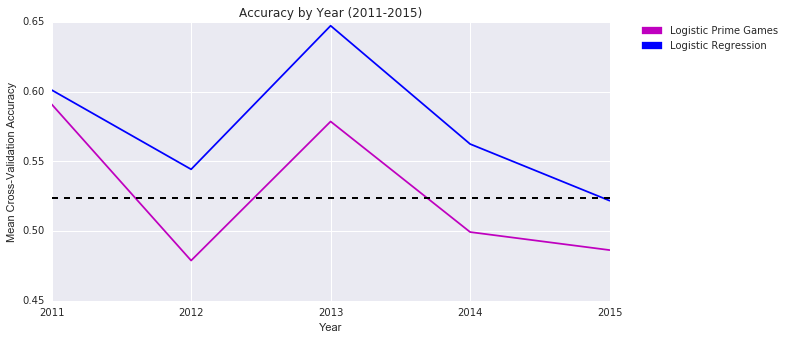

In [418]:
plt.figure(figsize=(10,5))
plt.plot(year, acc_logis, 'b-')
plt.plot(year, acc_logis_prime, 'm-')
# plt.plot(year, acc_svc, 'g-')
plt.plot(year, [0.5238095238095238]*5, 'k--', linewidth = 2)
plt.xlim([2011, 2015])
plt.xlabel('Year')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Accuracy by Year (2011-2015)')
plt.ticklabel_format(axis = 'x', useOffset=False)
plt.xticks(range(2011,2016))
blue = mpatches.Patch(color='blue', label='Logistic Regression')
red = mpatches.Patch(color='m', label='Logistic Prime Games')
# green = mpatches.Patch(color='green', label='SVC')

plt.legend(handles=[red, blue], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [571]:
# look at the entire feature set for random forest

last_5 = game_no_na[game_no_na.seas >= 2011]
X, y = pd.concat([last_5[last_5.columns[26:]], last_5[['ou', 'sprv']]], axis = 1), np.ravel(last_5.ou_result)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [125]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=1000, criterion='entropy',
                            max_depth=None, bootstrap=True, min_samples_split=1, 
                            oob_score=True, min_samples_leaf=1)
rfc_model.fit(X_train, y_train)
rfc_cvs = cross_val_score(rfc_model, X_train, y_train)
np.mean(rfc_cvs)

0.56197752019669833

In [126]:
rfc_acc = accuracy_score(y_test, rfc_model.predict(X_test))
print(rfc_acc)

0.559090909091


In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

score = {}
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    score[i] = accuracy_score(y_test, neigh.predict(X_test))

In [135]:
high = max(score, key=lambda i: score[i])
print(high, score[high])

16 0.586363636364


In [430]:
from sklearn.learning_curve import learning_curve

log_learn = learning_curve(logis_model, X, y)

train_cv_err = np.mean(log_learn[1], axis=1)
test_cv_err = np.mean(log_learn[2], axis=1)

In [2]:
# import matplotlib.patches as mpatches
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
# plt.plot(log_learn[0], train_cv_err, 'blue')
# plt.plot(log_learn[0], test_cv_err, 'red')

# blue = mpatches.Patch(color='blue', label='Train')
# red = mpatches.Patch(color='red', label='Test')
# plt.legend(handles=[blue, red], loc =1)

# plt.show()

In [3]:
# plt.plot(list(score.keys()), list(score.values()), 'blue')
# plt.plot(list(range(1,21)), [log_acc for i in range(1,21)], 'red')

# blue = mpatches.Patch(color='blue', label='KNN')
# red = mpatches.Patch(color='red', label='Logistic Reg')

# plt.legend(handles=[red, blue], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.show()

In [485]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

knn = KNeighborsClassifier(16,'distance',p=1) ## best k from previous challenges
lgr = LogisticRegression()
gnb = GaussianNB()
svc = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(50)
etc = ExtraTreesClassifier(100)
clfs = [lgr, knn, gnb, svc, dtc, rfc, etc]

In [486]:
from sklearn.metrics import roc_curve, auc

fprs,tprs,roc_aucs = [],[],[]
for clf in clfs:
    if clf==knn:
        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_test)[:,1]
    else:
        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_test)[:,1]
    
    y_true = y_test
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

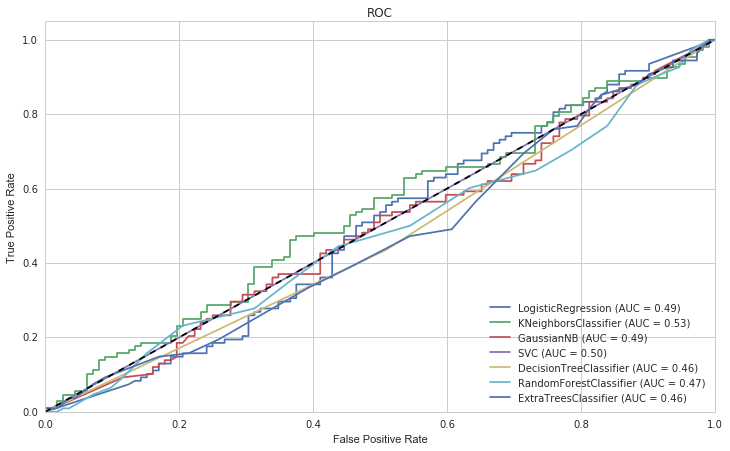

In [487]:
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    plt.plot(fprs[u], tprs[u], label='%s (AUC = %0.2f)' % (s,roc_aucs[u]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right");

In [508]:
from sklearn.metrics import f1_score, precision_score
accuracy_score(game_no_na.ou_result, log_model.predict(game_no_na[chosen]))

0.50384024577572961

In [433]:
game_seas

,gid,seas_x,seas_y,wk,day,v,h,stad,temp,humd,...,ypr_opp_roll3_v,ypr_opp_roll4_v,ypr_opp_roll5_v,ypr_opp_roll15_v,ypr_own_roll1_v,ypr_own_roll2_v,ypr_own_roll3_v,ypr_own_roll4_v,ypr_own_roll5_v,ypr_own_roll15_v
0,236,2000,2000,17,SAT,BUF,SEA,Husky Stadium,41,100,...,3.716581,3.898547,4.203048,3.431401,4.500000,3.750000,4.551282,4.700499,4.308547,3.861486
1,246,2000,2000,17,SUN,PIT,SD,Qualcomm Stadium,62,63,...,3.280525,3.664939,4.265285,3.818901,4.222222,3.286111,4.263657,4.391493,4.738194,4.209303
2,251,2000,2000,18,SUN,DEN,BAL,PSINet Stadium,22,49,...,4.540359,3.988602,4.000406,4.176025,3.785714,4.250000,4.046296,4.478600,4.947324,4.333678
3,254,2000,2000,19,SAT,MIA,OAK,Network Associates Coliseum,58,57,...,3.279227,3.117315,3.724621,4.304456,5.375000,3.666667,4.239316,3.957265,3.884731,3.723606
4,255,2000,2000,19,SUN,PHI,NYG,Giants Stadium,39,62,...,3.307108,3.299775,3.102978,3.927690,3.818182,3.880519,3.498124,3.447122,4.073083,4.652331
5,256,2000,2000,19,SUN,BAL,TEN,Adelphia Coliseum,48,42,...,2.355418,2.381948,2.234970,2.637882,3.263158,2.862348,3.520845,3.340634,3.641134,4.132017
6,257,2000,2000,20,SUN,MIN,NYG,Giants Stadium,35,76,...,4.849155,5.026866,5.088160,4.420963,3.190476,3.595238,4.221387,4.616040,4.937277,4.872395
7,258,2000,2000,20,SUN,BAL,OAK,Network Associates Coliseum,56,60,...,2.860029,2.721109,2.669195,2.695846,2.130435,2.696796,2.618377,3.173242,3.098594,3.837009
8,260,2001,2001,1,SUN,CHI,BAL,Ravens Stadium,83,66,...,3.219373,3.137744,3.510195,3.964084,4.115385,3.141026,2.965812,3.354794,3.276692,4.155824
9,261,2001,2001,1,SUN,NO,BUF,Ralph Wilson Stadium,87,52,...,3.676587,4.066964,4.408673,3.860200,1.562500,3.214583,3.165278,3.795011,3.502675,4.013040


In [200]:
from sklearn.cross_validation import train_test_split

diff = pd.concat([diff, game_no_na[['ou', 'sprv']]], axis =1)

X, y = diff, np.ravel(game_no_na.ou_result)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

NameError: name 'diff' is not defined

In [260]:
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)
gaus_cvs = cross_val_score(gaus_model, X_train, y_train)
np.mean(gaus_cvs)

0.49359959037378393

In [261]:
gaus_acc = accuracy_score(y_test, gaus_model.predict(X_test))
print(gaus_acc)

0.500768049155


In [262]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_acc = accuracy_score(y_test, svc_model.predict(X_test))
print(svc_acc)

0.490015360983


In [263]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc_model.predict(X_test))
print(dtc_acc)

0.537634408602


In [748]:
X_train.describe()

,beatspr_roll1_h,beatspr_roll2_h,beatspr_roll3_h,beatspr_roll4_h,beatspr_roll5_h,beatspr_roll15_h,beatsprpts_roll1_h,beatsprpts_roll2_h,beatsprpts_roll3_h,beatsprpts_roll4_h,...,ypr_opp_roll5_v,ypr_opp_roll15_v,ypr_own_roll1_v,ypr_own_roll2_v,ypr_own_roll3_v,ypr_own_roll4_v,ypr_own_roll5_v,ypr_own_roll15_v,ou,sprv
count,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,...,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000
mean,0.515665,0.507704,0.501113,0.505907,0.503852,0.506420,0.349512,0.071392,0.045797,0.158192,...,4.114060,4.118217,4.178276,4.176563,4.165553,4.165431,4.160070,4.140971,42.151002,2.676425
std,0.499883,0.352195,0.286215,0.247866,0.224686,0.124975,13.847492,9.870655,7.996322,6.961844,...,0.633546,0.433734,1.318459,0.956455,0.808783,0.718960,0.653850,0.447740,4.649764,5.608073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,-50.000000,-34.250000,-30.500000,-23.875000,...,1.710025,2.484179,-0.300000,1.408730,1.766667,2.175000,2.451690,2.738687,30.500000,-16.000000
25%,0.000000,0.500000,0.333333,0.250000,0.400000,0.400000,-8.500000,-6.250000,-5.333333,-4.500000,...,3.684284,3.817446,3.275000,3.537541,3.598941,3.666780,3.693650,3.825233,38.500000,-2.500000
50%,1.000000,0.500000,0.666667,0.500000,0.400000,0.533333,0.500000,0.000000,-0.166667,0.125000,...,4.085235,4.116370,4.100000,4.092915,4.098916,4.114770,4.129065,4.117074,42.000000,3.000000
75%,1.000000,1.000000,0.666667,0.750000,0.600000,0.600000,9.500000,6.250000,5.166667,4.750000,...,4.512427,4.426690,4.918919,4.747222,4.660642,4.606403,4.553461,4.431896,45.000000,6.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.866667,40.000000,40.500000,34.500000,28.125000,...,6.982444,5.602065,12.230769,8.226496,7.449965,6.966531,6.617249,5.848437,59.000000,22.000000


In [176]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# develop your "tuned parameters"

from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)



# iris=datasets.load_iris()
# X=iris.data
# y=iris.target

# X=X[y !=0,:2] 
# y = iris.target[y!=0]


# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
# n_samples = len(iris)


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    (X - X.mean()) / (X.max() - X.min()), y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2,1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel':['poly'],'degree':[1,2,3]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Grid scores on development set:

0.515 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 1}
0.492 (+/-0.012) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.1}
0.505 (+/-0.012) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.01}
0.515 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.515 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.515 (+/-0.000) for {'C': 10, 'kernel': 'rbf', 'gamma': 1}
0.485 (+/-0.011) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.1}
0.533 (+/-0.009) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.01}
0.506 (+/-0.015) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.515 (+/-0.000) for {'C': 10,

In [446]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

# 0.546 (+/-0.020) for {'C': 10, 'kernel': 'linear'}
# 0.541 (+/-0.013) for {'C': 100, 'kernel': 'linear'}

svc_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svc_model.fit(X_train, y_train)

svc_cvs = cross_val_score(svc_model, X_train, y_train)


print('SVC Cross-Validation Accuracy:') 
print(np.mean(svc_cvs))
print('SVC Test Set Accuracy:')
print(accuracy_score(y_test, svc_model.predict(X_test)))

SVC Cross-Validation Accuracy:
0.472727272727
SVC Test Set Accuracy:
0.522727272727


In [442]:
from scipy.stats import randint
from sklearn.grid_search import RandomizedSearchCV
from time import time
from operator import itemgetter
from sklearn.cross_validation import StratifiedKFold

# build a classifier
clf = RandomForestClassifier(n_estimators=50)


# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(1, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, scoring = 'recall',
                                   n_iter=n_iter_search)

start = time()

X_train, X_test, y_train, y_test = train_test_split(
    (X - X.mean()) / (X.max() - X.min()), y, test_size=0.25, random_state=0)

random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring= 'recall', cv =StratifiedKFold(np.ravel(y_train), n_folds=4))
start = time()
grid_search.fit(X_train, np.ravel(y_train))

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

RandomizedSearchCV took 4.98 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.456 (std: 0.051)
Parameters: {'min_samples_split': 6, 'max_features': 10, 'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 4, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.425 (std: 0.074)
Parameters: {'min_samples_split': 4, 'max_features': 4, 'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.415 (std: 0.047)
Parameters: {'min_samples_split': 6, 'max_features': 4, 'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 7, 'max_depth': None}

GridSearchCV took 69.65 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.494 (std: 0.031)
Parameters: {'min_samples_split': 10, 'max_features': 10, 'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.

In [445]:
rfc_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, 
                                    min_samples_split=10, min_samples_leaf=3, max_features=10, bootstrap=False)
rfc_model.fit(X_train, y_train)
                                   
rfc_cvs = cross_val_score(rfc_model, X_train, y_train)

rfc_acc = accuracy_score(y_test, rfc_model.predict(X_test))
print(np.mean(rfc_cvs), rfc_acc)

0.495454545455 0.504545454545


In [ ]:
from sklearn.cross_validation import cross_val_score

dtc_cvs = cross_val_score(dtc_model, X_train, y_train)
np.mean(dtc_cvs)

Training Data Accuracy: 0.59
Test Data Accuracy:     0.64
[[69 25]
 [38 44]]


Precision:              0.64
Recall:                 0.73


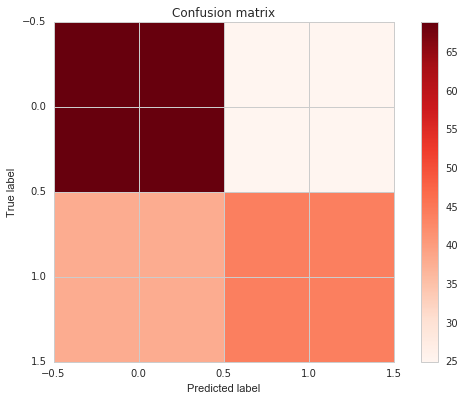

In [472]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print('\n')
    print("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)
    
train_score(logis_model,X_logis_RFECV, y)

In [1]:
110/210

0.5238095238095238

In [2]:
110*10 == 100*11

True

In [3]:
100*0.59 + -110*(1-0.59)

13.899999999999999

In [4]:
13.89/110

0.1262727272727273